In [49]:
import sys
import os
import math
import logging
import galsim
import matplotlib.pyplot as plt
import h5py
import numpy as np 
import random 

In [50]:

img_ = np.zeros((10,64,64))
gal_flux_ = np.zeros(10)
bulge_re_ =np.zeros(10)
disk_n_ =np.zeros(10)
disk_r0_ = np.zeros(10)
bulge_frac_ =np.zeros(10)  
gal_q_ = np.zeros(10)
gal_beta_ = np.zeros(10)



for i in range(10): 
# fixed parameters 
    image_size = 64        # n x n pixels
    pixel_scale = 0.23     # arcsec / pixel
    random_seed = 1314662
    rng = galsim.BaseDeviate(random_seed+1)
    bulge_n = 3.5          # Fixed 
    psf_beta = 2       #moffat parameter 
    psf_re=1         # moffat scale radius in arcsec 
    
    #parameter random generations  
    gal_flux = 1e6* random.uniform(1,100)        # ADU  ("Analog-to-digital units", the units of the numbers on a CCD)
    bulge_re = random.uniform(0,3)         # arcsec
    disk_n = random.uniform(1,2)          #
    disk_r0 = random.uniform(0,1)        # arcsec (corresponds to half_light_radius of ~3.7 arcsec)
    bulge_frac = random.uniform(0,1)    # 0 ~ 1 

    
    gal_q = random.uniform(0.2,0.7)       # (axis ratio 0 < q < 1)
    gal_beta = random.uniform(0,3.14)        #  radians 
 
    
    bulge = galsim.Sersic(bulge_n, half_light_radius=bulge_re)
    disk = galsim.Sersic(disk_n, scale_radius=disk_r0)
    gal = bulge_frac * bulge + (1-bulge_frac) * disk
    gal = gal.withFlux(gal_flux)
    gal_shape = galsim.Shear(q=gal_q, beta=gal_beta*galsim.radians)
    gal = gal.shear(gal_shape)
    psf = galsim.Moffat(beta=psf_beta, flux=1., half_light_radius=psf_re)   
    final = galsim.Convolve([psf, gal])
    image = galsim.ImageF(image_size, image_size,scale=pixel_scale)
    final.drawImage(image=image)


    
    img_[i]= image.array
    gal_flux_[i] = gal_flux
    bulge_re_[i] =bulge_re
    disk_n_[i] =disk_n
    disk_r0_[i] = disk_r0
    bulge_frac_[i] =bulge_frac
    gal_q_[i] =gal_q
    gal_beta_[i] = gal_beta





In [ ]:
   
with h5py.File("test.h5", "w") as fnew:
    fnew.create_dataset('img', data=img_)
    fnew.create_dataset('gal_flux', data=gal_flux_)
    fnew.create_dataset('bulge_re', data=bulge_re_)
    fnew.create_dataset('disk_n', data=disk_n_)   
    fnew.create_dataset('disk_r0', data=disk_r0_)
    fnew.create_dataset('bulge_frac', data=bulge_frac_)
    fnew.create_dataset('gal_q', data=gal_q_)
    fnew.create_dataset('gal_beta', data=gal_beta_)
    fnew.create_dataset('atmos_e', data=atmos_e_)
    fnew.create_dataset('atmos_beta', data = atmos_beta_)
    fnew.create_dataset('wcs_g1', data=wcs_g1_)
    fnew.create_dataset('wcs_g2', data=wcs_g2_)
print("yayyyyy, finish running")


In [51]:
gal_flux_

array([91717684.42622814, 30598677.8677306 , 38911329.74887563,
       20663011.59037712, 15866655.40985128, 85314146.31387642,
       65532145.84512409,  7073688.86763996, 38188345.06878072,
       64468875.40609406])

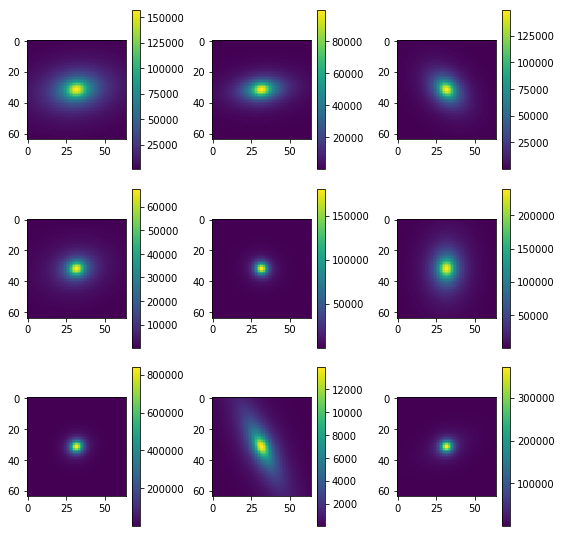

In [52]:
plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(3):
        plt.subplot2grid((12,12),(3*i,3*j),colspan=3,rowspan=3)
        plt.imshow(img_[(3*i)+j])
        plt.colorbar()
plt.tight_layout()

In [53]:
bulge_re_

array([2.9355879 , 2.11114524, 0.5346272 , 1.43736058, 1.54694463,
       2.06073418, 0.18091962, 2.25745595, 2.00297964, 1.43771267])

In [54]:
disk_n_

array([1.78455372, 1.20362039, 1.23883756, 1.76760143, 1.94147807,
       1.88420978, 1.03934321, 1.44980518, 1.91318583, 1.08661373])

In [55]:
disk_r0_

array([0.42149438, 0.67716464, 0.71588487, 0.61607944, 0.01036127,
       0.22209578, 0.07143472, 0.87712787, 0.00263035, 0.03792205])

In [56]:
bulge_frac_

array([0.14045983, 0.45788201, 0.16273888, 0.59843374, 0.31058117,
       0.18872533, 0.88281208, 0.44201355, 0.48896295, 0.66745123])

In [57]:
gal_q_

array([0.5536773 , 0.38911504, 0.61542318, 0.66082471, 0.69473431,
       0.62795448, 0.51410909, 0.22516049, 0.3988787 , 0.57500605])

In [58]:
gal_beta_

array([3.01219974, 3.03872873, 0.82002023, 2.94075021, 0.36206451,
       1.59800896, 2.72178661, 1.12400955, 2.74053919, 3.03950062])